# Analysis of P300 Data using MNE 

In [1]:
import mne 
import pandas as pd 

from make_raw import make_raw

### Load the data from HDF5

In [2]:
store = pd.HDFStore("../data/timeflux-P300-HELLOWORLD.hdf5", "r")
events = store.select("events")
signal = store.select("eeg")

rate = 250


### MNE Analysis: filter & epoch

In [3]:
raw = make_raw(signal, events, rate, "foo")

raw.notch_filter(50, method="iir")
raw.notch_filter(100, method="iir")
raw.filter(1, 40, method="iir")

Creating RawArray with float64 data, n_channels=8, n_times=113182
    Range : 0 ... 113181 =      0.000 ...   452.724 secs
Ready.
Setting up band-stop filter from 49 - 51 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 49.38, 50.62 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 99 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 99.25, 100.75 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB



<RawArray | foo, 8 x 113182 (452.7 s), ~6.9 MB, data loaded>

In [4]:
events, event_id = mne.events_from_annotations(raw)
reject = {'eeg': 100}
epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=-0.1, tmax=0.6, baseline=(-0.1, 0), reject=reject, preload=True, verbose=False)
#epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=0, tmax=.8, baseline=None, reject=reject, preload=True, verbose=False)
print(f'Dropped: ', (1 - len(epochs.events)/len(events)) * 100, '%')
epochs

Used Annotations descriptions: ['non-target', 'target', 'unknown']
Dropped:  0.0 %


Number of events,984
Events,non-target: 320target: 64unknown: 600
Time range,-0.100 – 0.600 sec
Baseline,-0.100 – 0.000 sec


### Plot the ERP

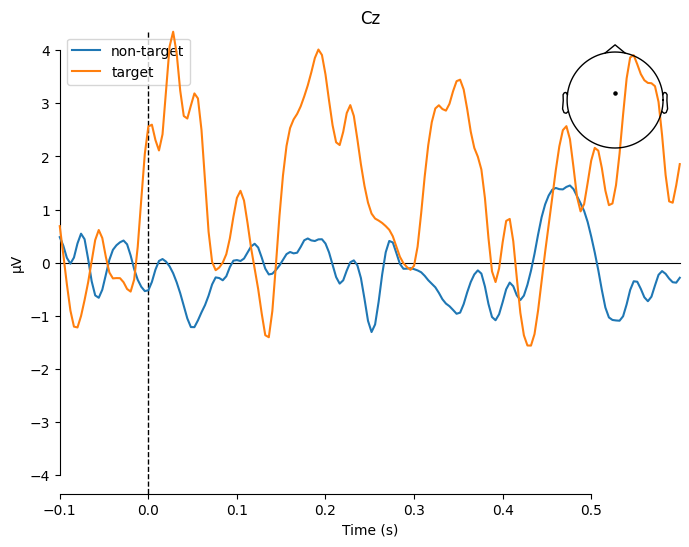

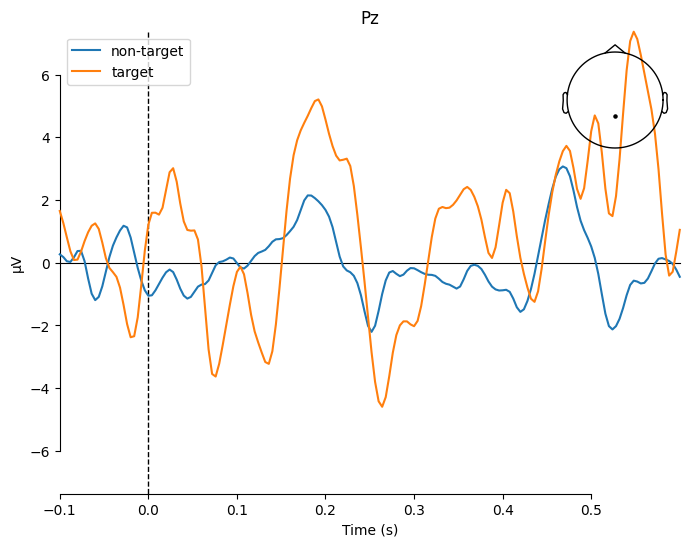

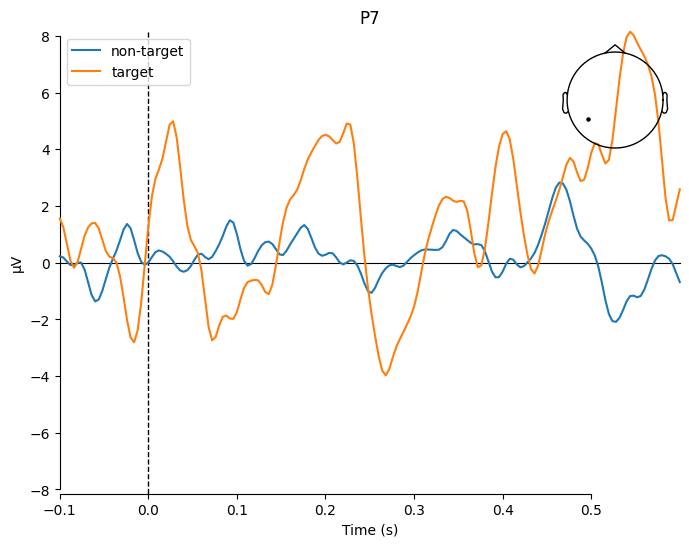

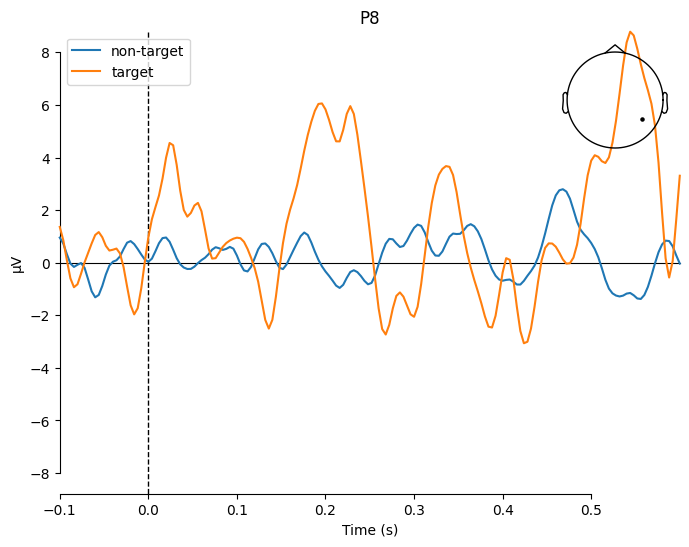

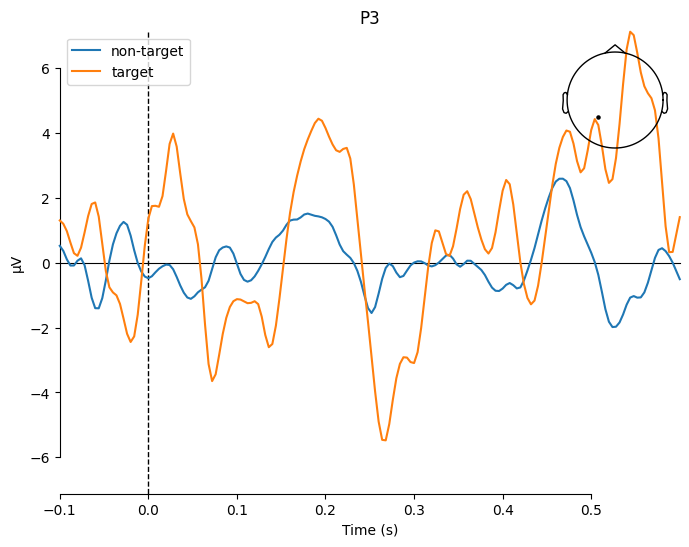

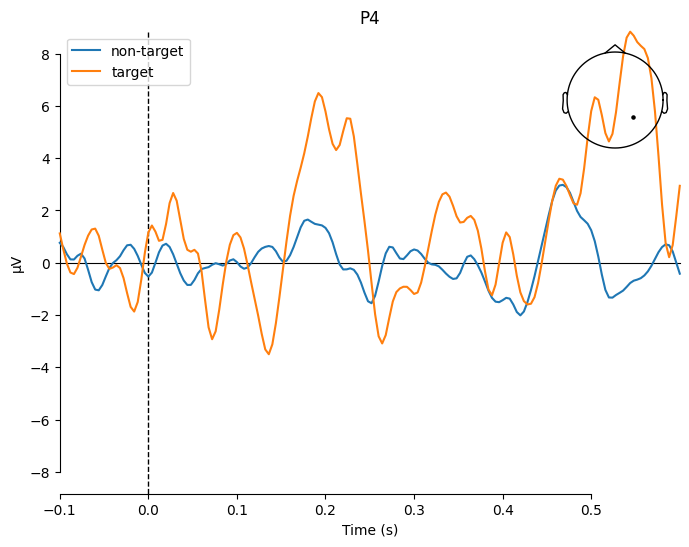

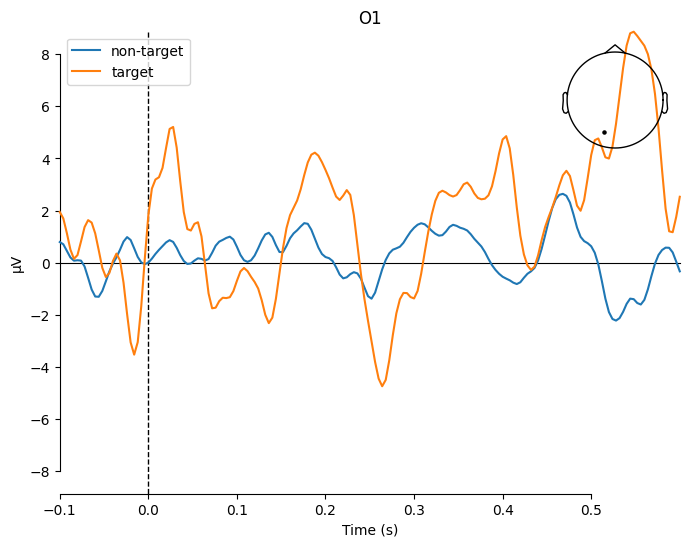

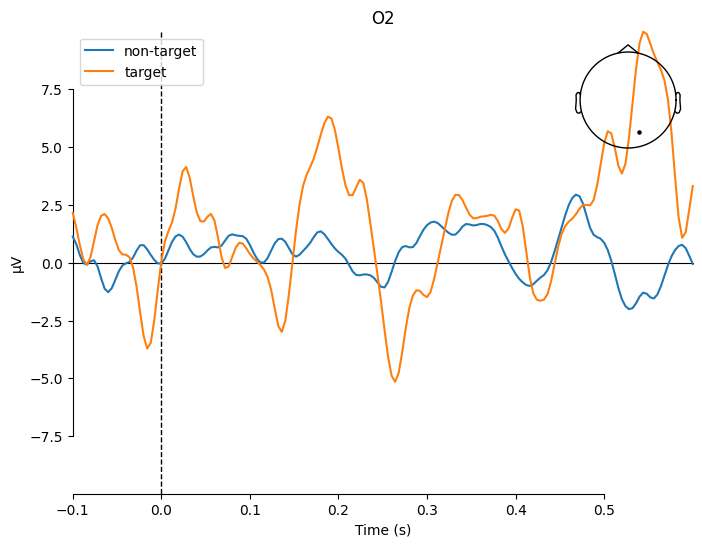

In [5]:
conditions = ['non-target', 'target']
conditions.sort()
evoked = {condition: epochs[condition].average() for condition in conditions}
for index, channel in enumerate(raw.ch_names):
    mne.viz.plot_compare_evokeds(evoked, picks=[index])